In [1]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

import tensorflow as tf
from tensorflow.keras.preprocessing import image as kimage
from tensorflow.keras.applications.vgg16 import preprocess_input

from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# load database
PATH = '/content/gdrive/My Drive/data/image_retrieval2/'
data = np.load(PATH+'images_mr.npy', allow_pickle=True)
data = data.astype(np.float32)

print(data.shape)
print(type(data[0,0,0,0]))

(9908, 86, 128, 3)
<class 'numpy.float32'>


In [4]:
# get model
model = tf.keras.applications.VGG16(include_top=False, weights='imagenet', input_shape=(60, 60, 3))
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 60, 60, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 60, 60, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 60, 60, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 30, 30, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 30, 30, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 30, 30, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 15, 15, 128)       0     

In [6]:
print(type(model.layers))
print(len(model.layers))

<class 'list'>
19


In [7]:
# check model
for i in range(19):
  print(model.layers[i].name)

input_2
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool


In [9]:
print(model.layers[1].name)

block1_conv1


In [12]:
print(data.shape)
Y_data = model.layers[1](data)
print(Y_data.shape)

(9908, 86, 128, 3)


ResourceExhaustedError: ignored

In [ ]:
def compute_feature_help(data):
  for i in range(1,19):
    data = model.layers[i](data)
  return data

In [ ]:
def compute_features(data):
  result = []
  chunk_size = 500
  num_chunks = data.shape[0]//chunk_size + 1   #roughtly

  for c in range(num_chunks):
    # batch
    begin = chunk_size*c
    end   = min(chunk_size*(c+1), data.shape[0])
    data_chunk = data[begin:end]

    # compute features for the batch
    data_chunk = compute_feature_help(data_chunk)
    result.append(data_chunk)

  return result

In [ ]:
# get dataset features
data = preprocess_input(data)
print(data.shape)

features_database = compute_features(data)
features_database = np.concatenate(features_database, axis=0)
print(features_database.shape)

(9908, 86, 128, 3)
(9908, 2, 4, 512)


In [ ]:
# for query
query = kimage.load_img(PATH+'q1.jpg', target_size=(86, 128))
query_np = kimage.img_to_array(query)
query_np = np.expand_dims(query_np, axis=0)
query_np = preprocess_input(query_np)

feature_query = compute_feature(query_np)
print(feature_query.shape)

(1, 2, 4, 512)


In [ ]:
# compute similarity
feature_query = np.reshape(feature_query,  (1, -1))
features_database = np.reshape(features_database, (9908, -1))

sims = cosine_similarity(feature_query, features_database).squeeze()
print(sims.shape)

(9908,)


In [ ]:
def getKey(item):
    return item[0]

lists = [i for i in range(9908)]
tps = zip(sims.tolist(), lists)
tps_sorted = sorted(tps, key=getKey, reverse=True)

for i in range(8):
    print(tps_sorted[i])

(0.9999999403953552, 20)
(0.5156837105751038, 6895)
(0.5005918145179749, 6867)
(0.4878757894039154, 6905)
(0.48176413774490356, 34)
(0.47962719202041626, 86)
(0.4761110842227936, 6892)
(0.4683660864830017, 4585)


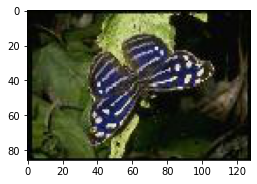

In [ ]:
# show query
import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(4,4))
plt.imshow(query)

In [ ]:
PATH = '/content/gdrive/My Drive/data/image_retrieval2/'
data_show = np.load(PATH+'images_mr.npy', allow_pickle=True)
data_show = data_show.astype(np.float32)
data_show = data_show/255.0

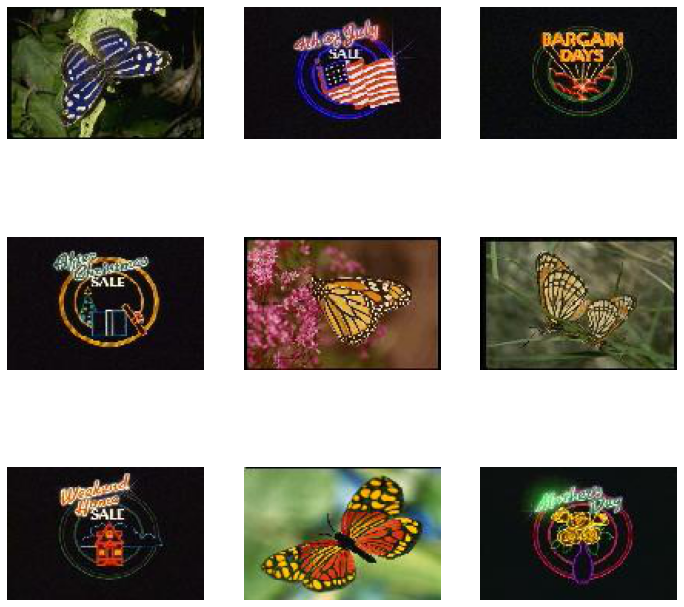

In [ ]:
fig = plt.figure(figsize=(12,12))
columns = 3
rows = 3
for i in range(1, columns*rows +1):
    index = tps_sorted[i-1][1]

    img = data_show[index]
    fig.add_subplot(rows, columns, i)
    
    plt.axis('off')
    plt.imshow(img)